# Fit namereneho prubehu axialniho mikropohybu podel osy $z$ modelem

## nacteni namerenych dat mikropohybu

In [2]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")
data_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_voltages.txt", delimiter="\t")
data_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_delim.txt", delimiter="\t")[:,:2]
voltages_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_voltages.txt", delimiter="\t")

fotkor_bezcond=np.concatenate( (data_bezcond_p1 ,data_bezcond_p2, data_bezcond_p3) ,axis=1)
voltages_bezcond=np.concatenate( (voltages_bezcond_p1 ,voltages_bezcond_p2, voltages_bezcond_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor_bezcond)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

In [3]:
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_delim.txt", delimiter="\t")[:,:8]
voltages_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_voltages.txt", delimiter="\t")
data_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_delim.txt", delimiter="\t")[:,:2]
voltages_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_voltages.txt", delimiter="\t")

fotkor_cond=np.concatenate( (data_cond_p1 ,data_cond_p2) ,axis=1)
voltages_cond=np.concatenate( (voltages_cond_p1 ,voltages_cond_p2) ,axis=0)

# pomocne promene
fotkor_cond_shape = np.shape(fotkor_cond)

# parametry odecitani foton-korelacnich dat
t_res_cond = 256e-12  # casove rozliseni histogramu v s
t_measure_cond = 100 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale_cond = np.array( range(0,fotkor_cond_shape[0]) ) *t_res_cond

analyza

In [4]:
# odhad periody triggeru
T_trig = ( fotkor_bezcond[fotkor_shape[0]-2, 9] / fotkor_bezcond[fotkor_shape[0]-3, 9] )* t_res + t_scale[fotkor_shape[0]-2]

# frekvence buzeni pasti

drive_freq = 1/T_trig
Omega = 2*np.pi * drive_freq
drive_freq

30032035.976450287

In [5]:
# odhad periody triggeru
T_trig_cond = ( fotkor_cond[fotkor_cond_shape[0]-2, 0] / fotkor_cond[fotkor_cond_shape[0]-3, 0] )* t_res_cond + t_scale_cond[fotkor_cond_shape[0]-2]

# frekvence buzeni pasti

drive_freq_cond = 1/T_trig_cond
Omega_cond = 2*np.pi * drive_freq_cond
drive_freq_cond



29907562.902327076

In [6]:
# funkce vracejici residua
def fit_resid(x, Omega, S, time_step):
    # x = [S_0, Delta S, phi]
    len_S = len(S)
    #print(len_S)
    S_fit = x[0] + x[1] * np.cos(Omega * time_step * np.arange(0, len_S) - x[2])
    return (S - S_fit)**2

def fit_func(x, Omega, time_points):
    return x[0] + x[1] * np.cos(Omega * time_points - x[2])

fit dat bez kondiku

In [7]:
from scipy.optimize import least_squares
# cyklus fitujici vsechny foton-korelacni data

x = np.zeros( (3,fotkor_shape[1]) )
DeltaS_S_ratio = []
for i in range(fotkor_shape[1]):
    x0 = [fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,i].max()
        -fotkor_bezcond[:fotkor_shape[0]-2,i].min() ), 2]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,i], t_res) , ftol=1e-10, xtol=1e-10)
    
    x[:,i] = fit.x
    DeltaS_S_ratio.append(x[1,i]/x[0,i]  )
    

fit dat s kondikem

In [8]:
# cyklus fitujici vsechny foton-korelacni data

x_cond = np.zeros( (3,fotkor_cond_shape[1]) )
DeltaS_S_ratio_cond = []
for i in range(fotkor_cond_shape[1]):
    x0 = [fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), 0.5* ( fotkor_cond[:fotkor_cond_shape[0]-2,i].max()
        -fotkor_cond[:fotkor_cond_shape[0]-2,i].min() ), -2]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega_cond, fotkor_cond[:fotkor_cond_shape[0]-2,i], t_res_cond) , ftol=1e-10, xtol=1e-10)
    
    x_cond[:,i] = fit.x
    DeltaS_S_ratio_cond.append( x_cond[1,i]/x_cond[0,i]  )

kontrola plotu

In [10]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

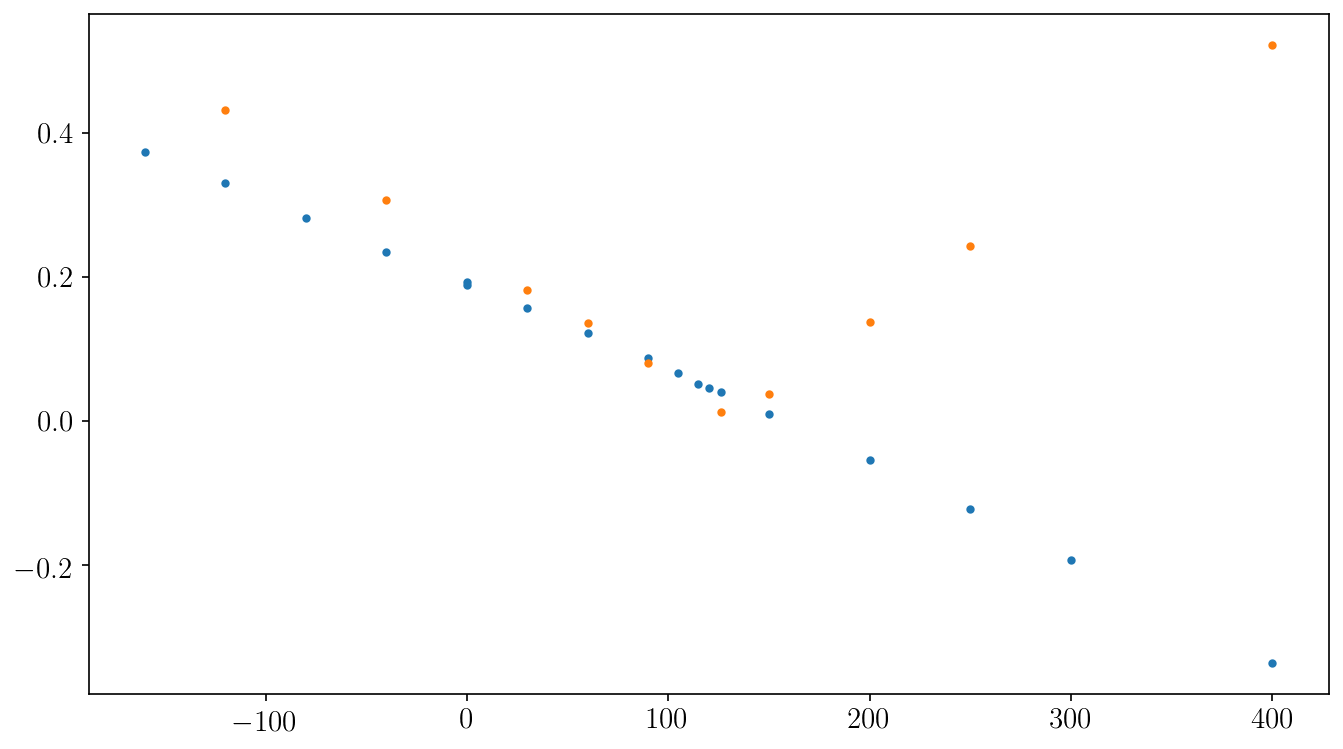

In [11]:
delta_U = voltages_bezcond[:,0] - voltages_bezcond[:,1]
delta_U_cond = voltages_cond[:,0] - voltages_cond[:,1]




my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(delta_U, DeltaS_S_ratio, '.')
plt.plot(delta_U_cond, DeltaS_S_ratio_cond, '.')

zavislost na z

In [12]:
alpha_bezcond = delta_U / (voltages_bezcond[:,0] + voltages_bezcond[:,1])
alpha_cond = delta_U_cond / (voltages_cond[:,0] + voltages_cond[:,1])

a = 0.000357087248516796
b = 0.0000614272209845667
c = 0.000214572720416111

z_bezcond = a* alpha_bezcond + b* alpha_bezcond**3 + c *alpha_bezcond**5
z_cond = a*alpha_cond  + b* alpha_cond**3 + c* alpha_cond**5

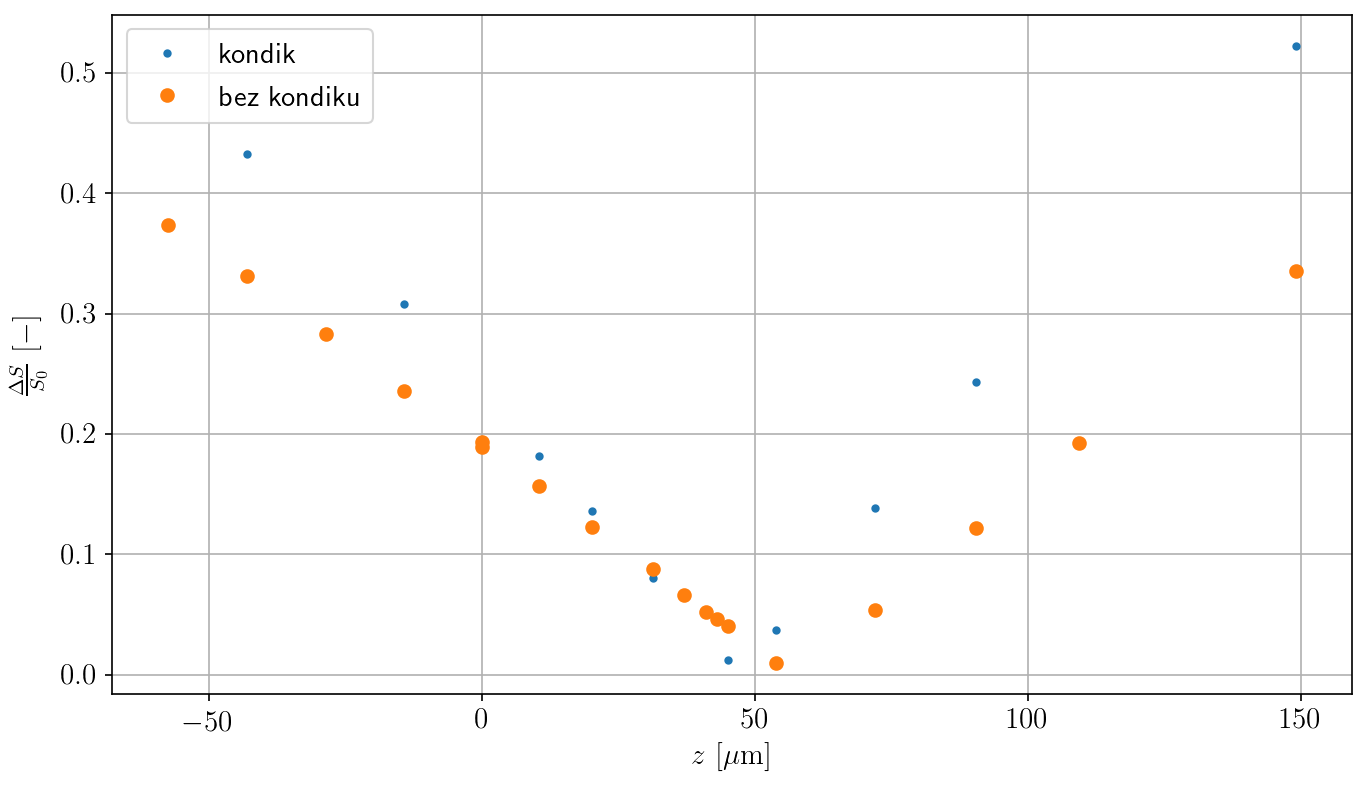

In [13]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_cond*1e6, np.abs( DeltaS_S_ratio_cond ), '.', label="kondik")
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.xlabel(r"$ z \, \, \rm [\mu m]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")

plt.legend()
plt.grid()

## fitovani techto dat

nactu si jednotkove osove pole z comsolu

In [14]:
## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,1]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
                                                # generovanem parem radialnich elektrod
    
leng_data = len(z_data)

nyni je treba definovat fci, ktera vraci amplitudu E_pole urcitym zpusobem skalovanou pro dane parametry.

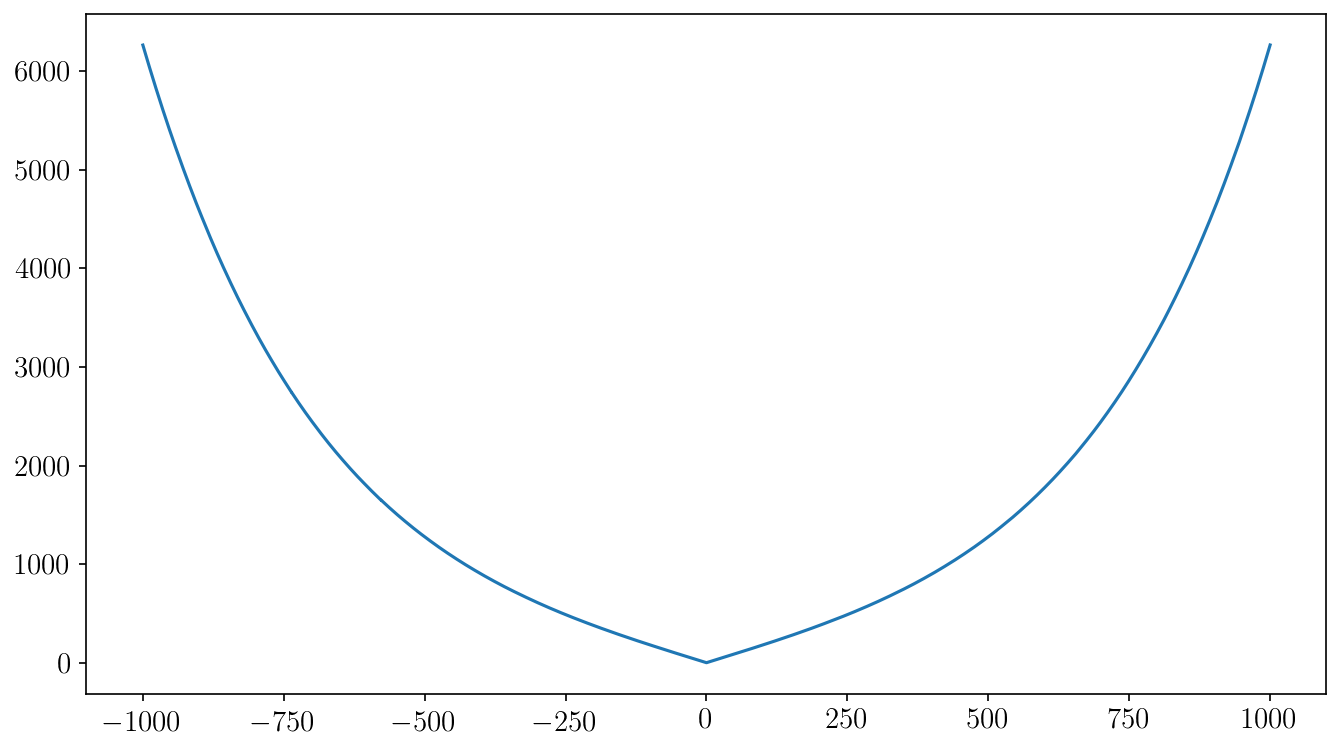

In [15]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0

phi = np.array( [0, phi_2, phi_56] )

rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )

E_rf_complex = rad_amp * E_field_rad_data_jedna - ax_5_amp * E_field_ax_data[::-1] + ax_6_amp * E_field_ax_data

# amplituda a faze
E_rf_amp = np.abs(E_rf_complex)


plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_data*1e3, E_rf_amp)

In [16]:
from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')

vypada ok

In [17]:
def E_rf_asym_amp(Vrf, phi, z, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # z = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z) + ax_6_amp * f_interp[2](z)

    # amplituda a faze
    return np.abs(E_rf_complex)

zkusim reprodukovat predchozi graf

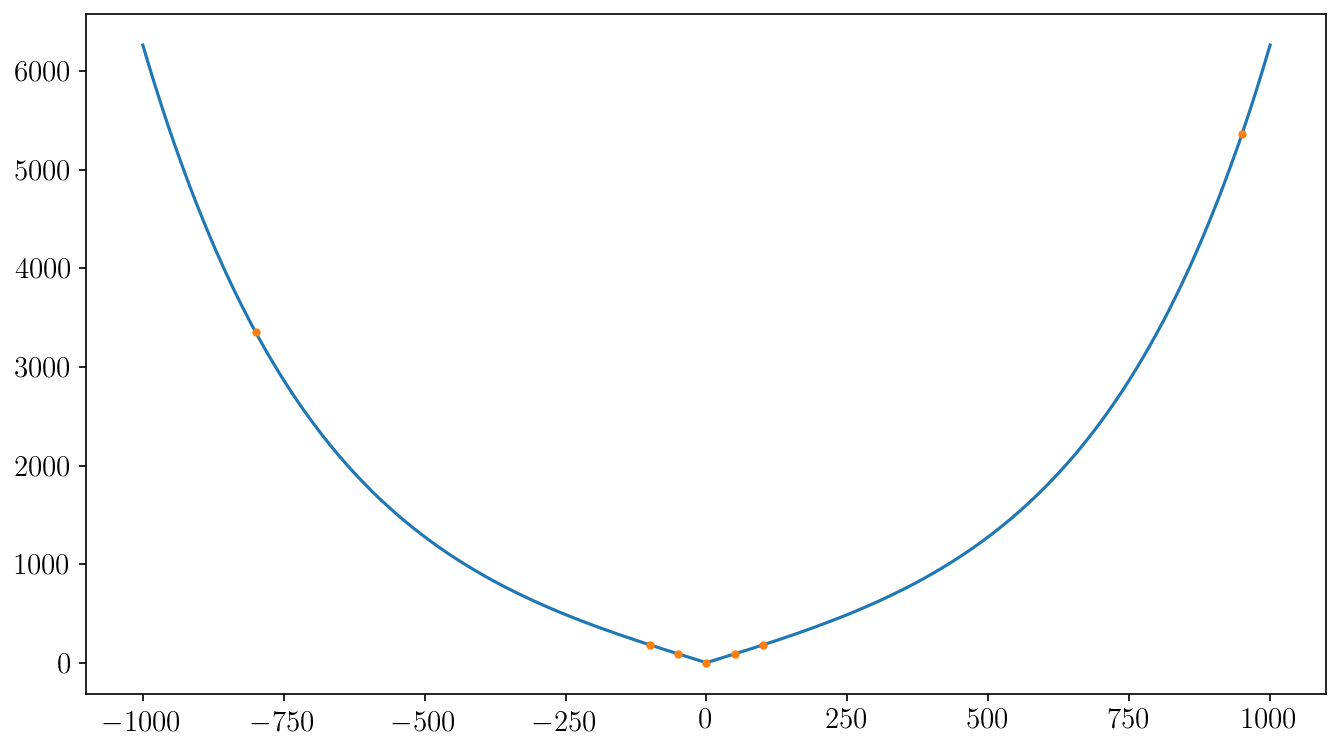

In [18]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0

phi = np.array( [0, phi_2, phi_56] )

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_data*1e3, E_rf_amp)
plt.plot([-800,-100, -50, 0, 50, 100, 950], E_rf_asym_amp(Vrf, phi, [-800,-100, -50, 0, 50, 100, 950],
                                                (E_field_rad_jedna , E_field_ax_5, E_field_ax_6)), '.')

ok, funguje 

## prechazim do faze fitovani

In [19]:
# funkce vracejici residua
def E_rf_amp_asym_resid(params, DS_S, z_points, f_interp):
    # params = [Vrf_1, Vrf_3, Vrf_5, Vrf_6, phi_2, phi_56, scale]
    # DS_S -> namerene hodnoty amplitudy modulace foton-kor. signaly
    # z_points -> ztove body v [um]
    
    Vrf = np.array(params[:4])
    phi = np.array( [ 0, params[4], params[5] ] )
    
    return( ( DS_S - params[6]*E_rf_asym_amp(Vrf, phi, z_points, f_interp)**2 ) )
    

pokus o fit

In [56]:
from scipy.optimize import least_squares

f_interp = (E_field_rad_jedna, E_field_ax_5, E_field_ax_6) # interpolacni fce jednotkovych osovych poli
DS_S_bezcond = np.abs(DeltaS_S_ratio)

params0 = [370, 370, 0, 50, 0, 0, 0.1e-2]

#fit = least_squares(E_rf_amp_asym_resid, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), 
#                    bounds=([369,369,0,0,-0.1,-0.5,1e-3],[370,370,100,100,0.1,0.5,5e-2] ), ftol=1e-10,
#                   method='dogbox')

fit = least_squares(E_rf_amp_asym_resid, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), 
                    bounds=([369,369,0,30,0,0,6e-4],[370,370,5,55,0.01,0.05,5e-3] ), ftol=1e-10,
                   method='dogbox')
fit

 active_mask: array([ 0,  0, -1,  0,  0,  0,  0])
        cost: 16233.659650151945
         fun: array([-2.57654696e+01, -2.57699906e+01, -1.69331036e+01, -1.02777687e+01,
       -4.81379616e+00, -2.78087117e+00, -1.71139505e+00, -1.26610071e+00,
       -8.61262217e-01, -1.76279836e-02, -2.23019035e+00, -1.01822061e+01,
       -2.43632605e+01, -7.52749766e+01, -4.10687220e+01, -6.00277145e+01,
       -8.30144610e+01, -1.10276545e+02])
        grad: array([ 6.72323283e+01,  6.72323283e+01, -5.78139524e+02,  3.09301200e+02,
       -1.84720979e-04,  1.75803824e-04,  5.43474582e+07])
         jac: array([[ 5.39206431e-05,  5.39206431e-05,  1.03915548e+00,
        -1.03915531e+00,  0.00000000e+00,  0.00000000e+00,
        -4.32648650e+04],
       [ 5.39206431e-05,  5.39206431e-05,  1.03915548e+00,
        -1.03915531e+00,  0.00000000e+00,  0.00000000e+00,
        -4.32648650e+04],
       [ 1.24852589e-02,  1.24852589e-02,  8.18624496e-01,
        -8.68390243e-01,  0.00000000e+00,  0.0000000

zkusim brute force

In [1]:
from scipy.optimize import brute

# funkce vracejici residua brute force
def E_rf_amp_asym_resid_sum(params, DS_S, z_points, f_interp):
    # params = [Vrf_1, Vrf_3, Vrf_5, Vrf_6, phi_2, phi_56, scale]
    # DS_S -> namerene hodnoty amplitudy modulace foton-kor. signaly
    # z_points -> ztove body v [um]
    
    Vrf = np.array(params[:4])
    phi = np.array( [ 0, params[4], params[5] ] )
    
    return( sum( ( DS_S - params[6]*E_rf_asym_amp(Vrf, phi, z_points, f_interp)**2 ) ) )

#rranges = ( slice(100.0,300.0,5.0), slice(100.0,300.0,5.0), slice(0.0,100.0,1.0), slice(0.0,100.0,1.0), 
#           slice(-0.1,0.1,0.01), slice(-0.5,0.5,0.02), slice(1.0e-3, 5.0e-2, 1.0e-3) )
rranges = ( (100,300), (100,300), (0,100), (0,100), (-0.1,0.1),(-0.5,0.5),(1e-3,5e-2) )

fit_brute = brute(E_rf_amp_asym_resid_sum, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), ranges=rranges,  full_output=0 , Ns=5)

NameError: name 'DS_S_bezcond' is not defined

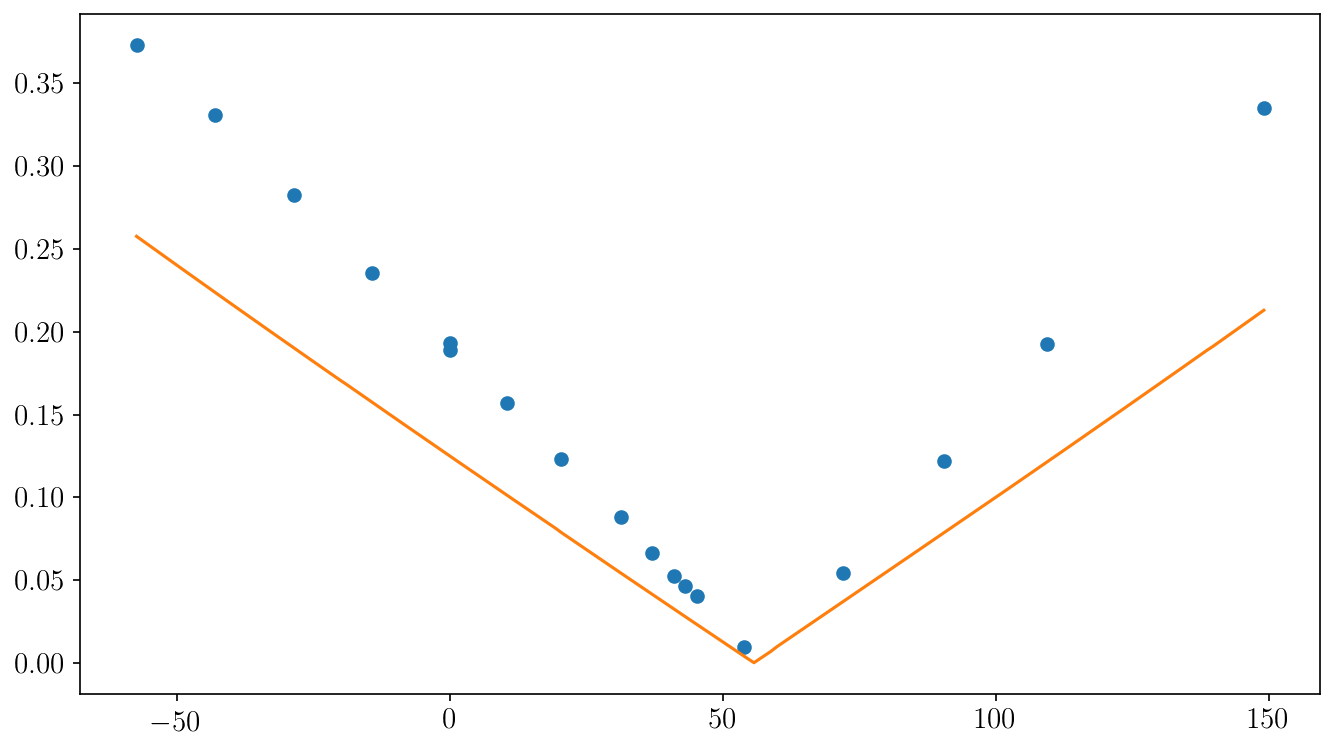

In [57]:
# vyploceni fitu

z_fit = np.linspace(z_bezcond.min()*1e6, z_bezcond.max()*1e6, 200)
E_amp_fit = fit.x[6]* E_rf_asym_amp(fit.x[:4], np.array( [0, fit.x[4], fit.x[5]] ), z_fit, f_interp )
#E_amp_fit = 0.1e-2* E_rf_asym_amp(np.array([370,370,0,50]), np.array( [0, 0, 0] ), z_fit, f_interp )

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.plot(z_fit, E_amp_fit)

Ocividne mam moc parametru a malo informaci. Zkusim teda pouzit dodatecne info.

In [69]:
# funkce vracejici residua
def E_rf_amp_asym_resid_2(params, DS_S, z_points, f_interp):
    # params = [Vrf_5, Vrf_6,  phi_56, scale]
    # DS_S -> namerene hodnoty amplitudy modulace foton-kor. signaly
    # z_points -> ztove body v [um]
    
    Vrf = np.array( [600,600] ) # Vrf_1, Vrf_3
    phi_2 = 0 # predpokladam taky, ze phi_2 = 0
    
    Vrf = np.append( Vrf, np.array(params[:2]) )
    phi = np.array( [ 0, phi_2, params[2] ] )
    
    return( ( DS_S - params[3]*E_rf_asym_amp(Vrf, phi, z_points, f_interp)**2 ) )
    

In [90]:
from scipy.optimize import least_squares

f_interp = (E_field_rad_jedna, E_field_ax_5, E_field_ax_6) # interpolacni fce jednotkovych osovych poli
DS_S_bezcond = np.abs(DeltaS_S_ratio)

params0 = [4, 85, 0, 5.5e-4]
bbounds = ([0,50,-0.1,1e-4],[30,100,0.1,1e-3] )

#fit = least_squares(E_rf_amp_asym_resid, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), 
#                    bounds=([369,369,0,0,-0.1,-0.5,1e-3],[370,370,100,100,0.1,0.5,5e-2] ), ftol=1e-10,
#                   method='dogbox')

fit = least_squares(E_rf_amp_asym_resid_2, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), 
                   bounds=bbounds, ftol=1e-10,
                  method='dogbox')

#fit = least_squares(E_rf_amp_asym_resid_2, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp), ftol=1e-10,
#                  method='dogbox')
fit

 active_mask: array([ 1,  0,  0, -1])
        cost: 2079.981477975329
         fun: array([-3.52607261e+00, -3.53059361e+00, -1.59303635e+00, -4.37269417e-01,
        7.63261875e-02,  1.59621802e-02, -1.52807543e-01, -2.76597957e-01,
       -4.40019103e-01, -1.40967687e+00, -5.05384276e+00, -1.10751798e+01,
       -1.97566270e+01, -4.69893881e+01, -7.41803351e+00, -1.27206220e+01,
       -1.95541573e+01, -2.80056175e+01])
        grad: array([-3.62039680e+00, -3.32326205e+01,  4.31704918e+00,  4.20511521e+07])
         jac: array([[ 1.60585046e-01, -1.60585049e-01, -8.34465027e-06,
        -3.71952205e+04],
       [ 1.60585046e-01, -1.60585049e-01, -8.34465027e-06,
        -3.71952205e+04],
       [ 1.06947641e-01, -1.13449185e-01, -2.46998668e-03,
        -1.75013442e+04],
       [ 5.88611839e-02, -6.60284294e-02, -5.10576367e-03,
        -5.60382747e+03],
       [ 8.29612122e-03, -9.90693541e-03, -8.39871168e-03,
        -1.18508170e+02],
       [-1.68596680e-02,  2.08026381e-02, -1.

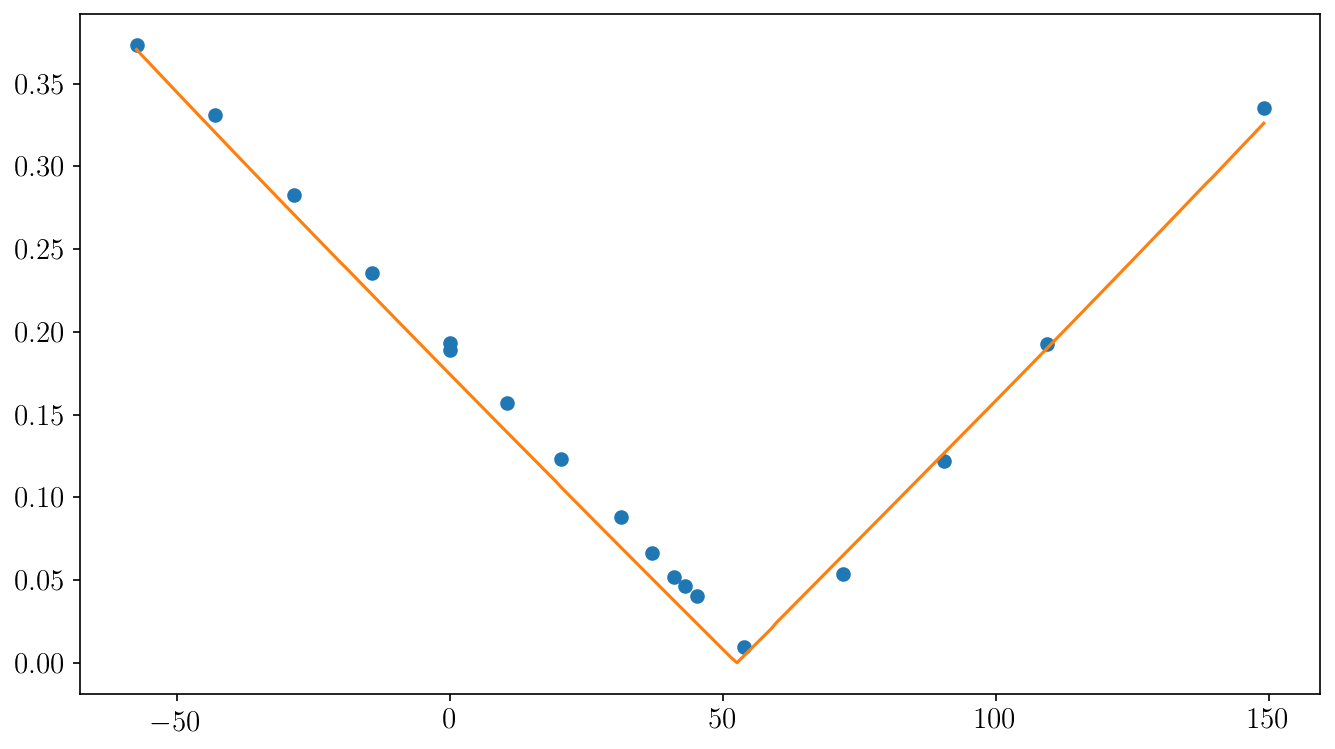

In [102]:
# vyploceni fitu

z_fit = np.linspace(z_bezcond.min()*1e6, z_bezcond.max()*1e6, 200)
#E_amp_fit = fit.x[3]* E_rf_asym_amp(np.append(np.array([600,600]),fit.x[:2]), np.array( [0, 0, fit.x[2]] ), z_fit, f_interp )
E_amp_fit = 5.9e-4* E_rf_asym_amp(np.array([560,560,4,75]), np.array( [0, 0, 0] ), z_fit, f_interp )

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.plot(z_fit, E_amp_fit)

Vypada to, ze nafitovat to timto zpusobem nebude tak jednoduche. Napada me, ze nepresnost polohy axialnich elektrod by mohl mit vliv. 